In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = np.load("/Volumes/Transcend/calculations/descriptor_speed/batches_results.npz")

In [3]:
samples = data["arr_0"]
batches = data["arr_1"]
times = data["arr_2"]

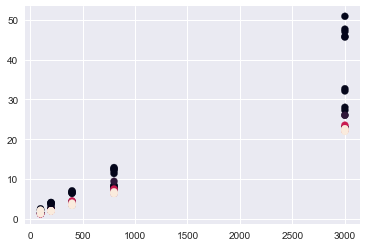

In [4]:
plt.scatter(samples, times, marker='o', c=batches)
plt.show()

In [5]:
unique_batches = np.unique(batches)

In [6]:
new_samples = []
new_times = []

for i in range(len(unique_batches)):
    temp_samples = []
    temp_times = []
    for j in range(len(batches)):
        if batches[j] == unique_batches[i]:
            temp_samples.append(samples[j])
            temp_times.append(times[j])
    new_samples.append(temp_samples)
    new_times.append(temp_times)

In [7]:
unique_samples = []
mean_times = []
stdev_times = []

for i in range(len(unique_batches)):
    temp_samples = []
    temp_mean_times = []
    temp_std_times = []
    for j in range(0, len(new_samples[i]), 5):
        temp_samples.append(new_samples[i][j])
        mean = np.mean(new_times[i][j:j+5])
        stdv = np.std(new_times[i][j:j+5])
        temp_mean_times.append(mean)
        temp_std_times.append(stdv)   
    unique_samples.append(temp_samples)
    mean_times.append(temp_mean_times)
    stdev_times.append(temp_std_times)

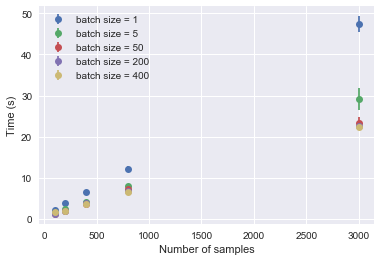

In [8]:
for i in range(len(unique_batches)):
    lab="batch size = " + str(unique_batches[i])
    plt.errorbar(unique_samples[i], mean_times[i], yerr=stdev_times[i], fmt='o', label=lab)
    
plt.xlabel("Number of samples")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

In [9]:
print(np.asarray(unique_samples).shape)

(5, 5)
